This documention is made from a jupyter notebook available in 'Exemple/Documentation.ipynb'

# Load data from G50 analyser
Loading data from G50 analyser after you convert binary file into ASCII file with 5 columuns. The ‘micro_test.bmp’ file should be a black and white image with the grains boundaries in white.

In [6]:
import AITAToolbox.loadData_aita as lda
import matplotlib.pyplot as plt

data=lda.aita5col('orientation_test.dat','micro_test.bmp')

Sucessfull aita build !


# Basic treatment
## Filter the data
This function filter the bad indexed value. Using G50 analyser a quelity factor is given between 0 and 100. Usualy using data with a quality factor higher than 75 is a good option.

In [7]:
data.filter(75)

## Croping
Sometimes it can be usefull to select a sub area.

**Warning :** This function need an interaction with a figure. Hence it cannot ne used with jupyter notebook such as '%matplotlib inline'

In [ ]:
data.crop()

# Colormap
Plotting the colormap with the grains boundaries

Text(0.5, 1.0, 'Colormap')

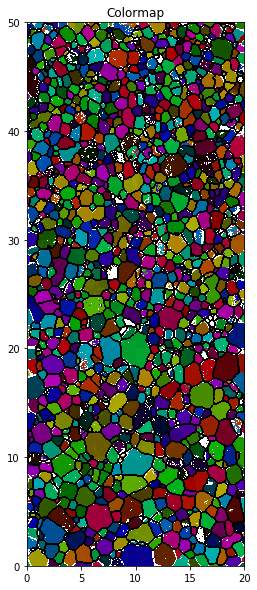

In [8]:
plt.figure(figsize=(10,10))
data.plot()
data.micro.plotBoundary(dilatation=4)
plt.title('Colormap')

The associated colorwheel :

Text(0.5, 1.0, 'LUT')

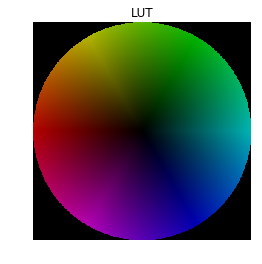

In [9]:
plt.imshow(lda.aita.lut())
plt.axis('off')
plt.title('LUT')

# Pole figure
There is various option to plot the pole figure here we focus on some of them but to see all of them refer to the documentation of plotpdf function.

The color coding of the pole figure is obtain using a Kernel Density Estimation (KDE). This KDE has to be manipulating carrefully. If you want to have a basic idea of what is a KDE you can look at https://mathisonian.github.io/kde/.

## Representation
### Pole figure all sample
Here some of the option are shown as contour plot, and with or without circle for specific angle.

Be aware that to reduce the computation time we only used by default 10000 orientations selected randomly. You can modify this using 'nbp' value. If you set nbp to 0 it use all the data.

In [22]:
plt.figure(figsize=(20,20),dpi=160)
plt.subplot(2,2,1)
data.plotpdf(contourf=True,angle=0)
plt.subplot(2,2,2)
data.plotpdf(contourf=True)
plt.subplot(2,2,3)
data.plotpdf(angle=0)
plt.subplot(2,2,4)
data.plotpdf()

array([0.29090318, 0.36842623, 0.3406706 ], dtype=float32)

## Kernel Density Estimation
If you want to have an idea of a basic KDE in dimention refer to https://mathisonian.github.io/kde/

Here there is some specificities du to the fact that we are computing KDE on a sphere. To do so we are using sklearn.neighbors.KernelDensity (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html). 

The 'metric' is set to 'haversine' for spherical computation (for exemple see https://scikit-learn.org/stable/auto_examples/neighbors/plot_species_kde.html#sphx-glr-auto-examples-neighbors-plot-species-kde-py)

We are using a gaussian kernel.

**Warning :** The 'bandwidth' parameter is crutial parameter to set. It can have a strong influence on your pole figure and you interpretation. You should set it up carefully and be critic on your PDF. Here we show different pole figure for different bandwidth value

In [14]:
plt.figure(figsize=(20,20),dpi=160)
plt.subplot(2,2,1)
data.plotpdf(contourf=True,angle=0,bw=0.05)
plt.title('bw=0.05')
plt.subplot(2,2,2)
data.plotpdf(contourf=True,angle=0,bw=0.1)
plt.title('bw=0.1')
plt.subplot(2,2,3)
data.plotpdf(contourf=True,angle=0,bw=0.3)
plt.title('bw=0.3')
plt.subplot(2,2,4)
data.plotpdf(contourf=True,angle=0,bw=2.0)
plt.title('bw=2')

Text(0.5, 1.0, 'bw=2')